# Description

This notebook uses the model-based maximum temperature distributions from the bias-adjusted CMIP5 data to evaluate discrete probability ratios between the modern warming period (i.e., the "forced" period) and the pooled model counterfactual (see [CMIP5_resample_CF.ipynb](./CMIP5_resample_CF.ipynb)) in order to visualize the global fingerprint in the attribution analysis; for more information on these periods and their global means, see [hadcrut_GMST.ipynb](hadcrut_GMST.ipynb).

The probability ratios (PRs)---calculated as a function of specific quantiles or query maximum temperatures---are used as estimates of the attributable changes at each location and month; in this notebook we plot the monthly maps of PRs and the model-by-model PRs each month.

**FIGURES PRODUCED IN THIS CODE**
* [Fig. S7](./paper_figures/si/figS7.pdf)
* [Fig. S9](./paper_figures/si/figS9.pdf)
* [Fig. S10](./paper_figures/si/figS10.pdf)

**TABLES PRODUCED IN THIS CODE**
* Table S1

In [11]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import utilities as util
import analysisfx as analysis
import pandas as pd
import os

# ignore depreciation warnings in this code
import warnings
warnings.filterwarnings("ignore")

# define the locations to save the figures into
fig_si_savepath='./paper_figures/si/'

In [21]:
# set up things for plot
monstr=['J','F','M','A','M','J','J','A','S','O','N','D']
monnames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cmapgray=plt.get_cmap('viridis').copy()
cmapgray.set_under(color="gray",alpha=0.5)

# (define the months array from loaded data)
monthsi=np.arange(1,13)

# Load Data

### Load in the Berkeley data land-sea mask

In [3]:
# define the path and load the lsm
lsm_loadpath='/home/dgilford/fingerprints/data/analysis/paper/berkeley_lsm.nc'
lsm=xr.open_dataset(lsm_loadpath)

## Set up Load for Model Data

Bias-adjusted data is loaded from local files.

In [23]:
# define the location of the bias-adjusted models
fLpath='/home/dgilford/fingerprints/data/bias_correction/'

# load the model names/directories that contain 'Nat' string
fl=[f for f in os.listdir(fLpath)]
fnat=[i for i in fl if 'Nat' in i]
fhist=[i for i in fl if 'Nat' not in i]
modelnames=[s[:-52] for s in fhist]
nmodel=len(modelnames)

# print to see the forced models
print(modelnames)
print('\n'+str(nmodel)+' Forced historical (bias-adjusted) model runs located')

['CMCC-CM', 'CMCC-CMS', 'MIROC-ESM', 'CSIRO-Mk3-6-0', 'MPI-ESM-MR', 'inmcm4', 'IPSL-CM5B-LR', 'CESM1-BGC', 'bcc-csm1-1-m', 'MIROC-ESM-CHEM', 'CMCC-CESM', 'MPI-ESM-LR', 'CanESM2', 'NorESM1-M', 'GFDL-CM3', 'MIROC5', 'MRI-CGCM3', 'EC-EARTH', 'ACCESS1-0', 'IPSL-CM5A-MR', 'ACCESS1-3', 'CCSM4', 'CESM1-CAM5', 'bcc-csm1-1']

24 Forced historical (bias-adjusted) model runs located


### Load Crossing period metadata

In [14]:
# define the load path for the crossing-year data file, and load
crossfile='./data/analysis/CMIP5_crossing_year_1.07C.csv'
crossdat=pd.read_csv(crossfile)

# clean up
crossdat.index=crossdat['Unnamed: 0'].rename('ModelName')
crossdat=crossdat.drop(columns=['Unnamed: 0'])

# print the data, which forms the basis for Table S1
display(crossdat)

,CrossYear_1.07C,FirstYear,LastYear
ModelName,,,
ACCESS1-0,2014,1999,2029
ACCESS1-3,2018,2003,2033
CCSM4,2000,1985,2015
CESM1-BGC,2003,1988,2018
CESM1-CAM5,2014,1999,2029
CMCC-CESM,2025,2010,2040
CMCC-CM,2017,2002,2032
CMCC-CMS,2020,2005,2035
CSIRO-Mk3-6-0,2022,2007,2037


### Natural Distributions

In [16]:
# define the path that we saved the pooled distribution into
pooled_loadpath='./data/cmip5/cf/'

# load the natural distribution
nat_loadsavename='pooledCF_mon{month:02d}.zarr'
natin=util.load_zarr_local(pooled_loadpath,zarrname=nat_loadsavename.format(month=1))

# define the name of the pooled distribution variable
pooledvarname='CF_pooled'

# set up resampling
N=int(1e4)

# Calculate Monthly Probability Ratios: 96.7th percentile

## By individual model

In [18]:
# define the variable names
prname='PR'
forcedname,cfname='forced','counterfactual'

In [19]:
# define a quantile grid for analyses
ppgrid=np.array([90,95,96.667,97.5,99])
qgrid=ppgrid/100

In [28]:
# loop over quantiles of interest
for qj in np.array(qgrid[2:3]):
    
    # where are we in the loop?
    print('quantile='+str(qj))
    
    # loop over all the months
    for mi in monthsi:
        
        # loop over the models and load in their data
        for hh,fi in enumerate(fhist):
            
            # define the model name
            mname=fi[:-52]
            print(mname)
            
        ouch

quantile=0.96667
CMCC-CM
CMCC-CMS
MIROC-ESM
CSIRO-Mk3-6-0
MPI-ESM-MR
inmcm4
IPSL-CM5B-LR
CESM1-BGC
bcc-csm1-1-m
MIROC-ESM-CHEM
CMCC-CESM
MPI-ESM-LR
CanESM2
NorESM1-M
GFDL-CM3
MIROC5
MRI-CGCM3
EC-EARTH
ACCESS1-0
IPSL-CM5A-MR
ACCESS1-3
CCSM4
CESM1-CAM5
bcc-csm1-1


NameError: name 'ouch' is not defined

In [20]:
# loop over quantiles of interest
for qj in np.array(qgrid[2:3]):
    
    # where are we in the loop?
    print('quantile='+str(qj))
    
    # loop over all the months
    for mi in monthsi:
        
        asd

        # load monthly data
        qxx_datin=xr.open_dataset(qxx_loadpath.format(month=mi))
        
        # get the monthly temperature threshold from the CF, associated with the quantile
        Tthresh_qj=qxx_datin[cfname].stack(z=['time','quantile']).quantile(qj,dim='z')
        
        # calculate the PR associated with the counterfactual temperatures
        qxx_pr_mi=analysis.calculate_PR_Tthresh(qxx_datin,Tthresh_qj, \
                                             forced=forcedname,cf=cfname, \
                                             dim=['time','quantile'])
        del qxx_datin
        # reorganize the output into an xarray dataset
        qxx_pr_mi=qxx_pr_mi.rename(prname).to_dataset()

        # apply land-sea mask: fill all ocean areas with missing
        qxx_pr_mi=qxx_pr_mi[prname].where(lsm==True).rename({'lsm':prname})
        
        # merge into a single dataset
        if mi==1:
            qxx_pr=qxx_pr_mi.copy(deep=True)
            qxx_Tthresh=Tthresh_qj.copy(deep=True)
        else:
            qxx_pr=xr.merge([qxx_pr,qxx_pr_mi])
            qxx_Tthresh=xr.merge([qxx_Tthresh, Tthresh_qj])
        del qxx_pr_mi, Tthresh_qj
        
        # where are we in the loop?
        print('mon index='+str(mi))



quantile=0.96667


NameError: name 'monthsi' is not defined

# Global Map each Month (96.7th percentile)

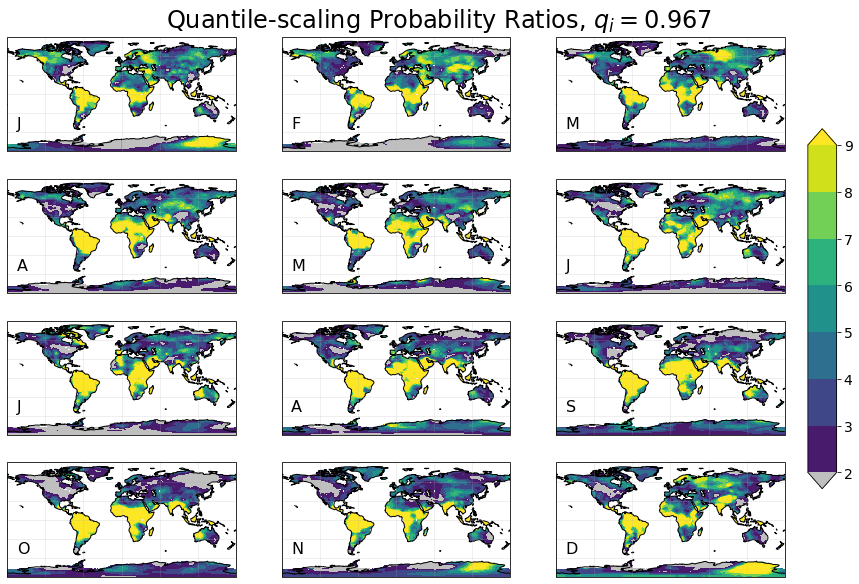

In [8]:
# set up plots for this quantile
fig=plt.figure(figsize=(16,10))

# loop over all the months
for mi in monthsi:
        
        # extract the data we need
        PR_mi=qxx_pr[prname].sel(month=mi)

        ## PLOT
        # wrap around the prime meridian before plotting
        PR_mi_cyc = util.xr_add_cyclic_point(PR_mi, 'lon')
    
        # plot the result
        ax = plt.subplot(4, 3, mi, projection=ccrs.PlateCarree())

        levs=np.arange(2,9+1,1)
        datp=ax.contourf(PR_mi_cyc.lon,PR_mi_cyc.lat,PR_mi_cyc, \
                            levels=levs, transform=ccrs.PlateCarree(), \
                            cmap=cmapgray, extend='both')

        # draw the coastlines
        ax.coastlines()
        ax.gridlines(alpha=0.25)
        
        # add the month string
        plt.text(-165,-53,monstr[mi-1],fontsize=16,transform=ccrs.PlateCarree())
        
        # clean up
        PR_mi

# make a single large colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.25, 0.025, 0.5])
ticklabs = cbar_ax.get_yticklabels()
cbar_ax.set_yticklabels(ticklabs, fontsize=14)
fig.colorbar(datp, cax=cbar_ax)

# write the full figure's title
fig.suptitle('Quantile-scaling Probability Ratios, $q_i='+str(round(qj,3))+'$', fontsize=24, y=0.92)

# save the plot out
plot_save_name='figS6.pdf'
fig.savefig(fig_si_savepath+plot_save_name, dpi=300, bbox_inches='tight')